# California Housing Price Prediction Model

# Liam Nguyen



## Objectives
1) Perform Data Analysis/Uncover insights
2) Apply Data Science concep to solve problem


## Introduction 

In this project, I will perform EDA (Exploratory Data Analysys) to get insight from the data and create a Machine Learning model to predict housing price for California districts using regression. This prediction model can assist house seller or real estate agent to make better decision on valuating house price.


## Dataset

California housing price from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import housing dataset to DataFrame format.
df = pd.read_csv('housing.csv')

In [46]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
# Check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we can see, 'total_bedrooms' column has some missing values, we will fill in these missing values later.

In [48]:
# Explore statistical data of the dataset .
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
# Fill in missing values with the mean of 'total_bedrooms' column.
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [50]:
print('Check if there is still missing value in this column:')
print(df['total_bedrooms'].isnull().sum())

Check if there is still missing value in this column:
0


## EDA
Let's creata a heatmap see how all data correlate to one another

Text(0.5, 1.0, 'Correlation Heatmap')

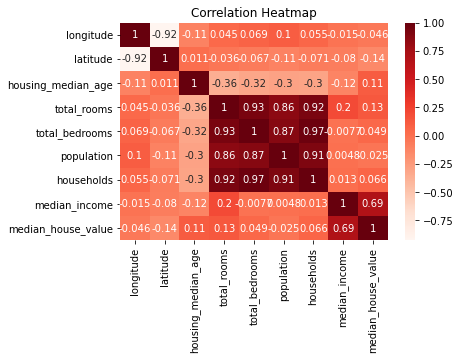

In [53]:
sns.heatmap(df.corr(), cmap = 'Reds', annot =True)
plt.title('Correlation Heatmap')

The above map is showing a very low correlation between Longitude & Lattitude with other varibles. Therefore, we will exclude them from our predictive model.

### Let's see the relationship between the variables in our dataset

In [7]:
sns.pairplot(df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']], hue= 'ocean_proximity')

## Training the Linear Regression Model
Let's now begin to train out regression model! We will first split up our data into an X array that contains the features to train on, and a y array with the target variables, in this case the 'median_house_value' column. We will toss out the 'ocean_proximity' column because it only has text info that the linear regression model can't use.


X and y arrays

In [87]:
X = df[['housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households', 'median_income']]

y = df['median_house_value']

## Split the data into training and testing set
We will train our model on the training set and then use test set to evaluate the model.

In [88]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Testing setis 20% and training set is 80% 

## Creating and Training the Model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# Create a Linear Regression object for the model.
lm = LinearRegression() 

In [94]:
# Fit the model to our training set.
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients.

In [95]:
# Print the intercept.
print(lm.intercept_)

-47897.5854380285


In [96]:
# Explore the coefficient and create Data Frame of columns and coefficient.
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns =['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1896.998244
total_rooms,-20.002819
total_bedrooms,101.942122
population,-35.651793
households,127.029956
median_income,47958.908370


## Prediction from our Model
We will grab predictions off our test set and see how well it did!

In [97]:
predictions = lm.predict(X_test)

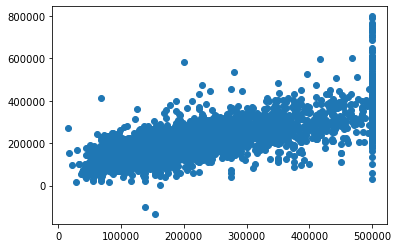

In [98]:
plt.scatter(y_test, predictions)

In [100]:
# Create chart to compare Predicted values and Actual values
pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions, 'Difference': (predictions - y_test)/y_test})

,Actual value,Predicted value,Difference
20046,47700.0,100859.767098,1.114461
3024,45800.0,144764.551797,2.160798
15663,500001.0,271494.985143,-0.457011
20484,218600.0,255417.000906,0.168422
9814,278000.0,219523.289988,-0.210348
...,...,...,...
15362,263300.0,198384.305751,-0.246547
16623,266800.0,170562.315983,-0.360711
18086,500001.0,430436.696232,-0.139128
2144,72300.0,167785.320022,1.320682


## Regression Evaluation Metrics

In this section, we will calculate 3 common evaluation metrics to check the performance of our model.

In [101]:
from sklearn import metrics

In [102]:
# Evaluate MAR, MSE and RMSE metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 56739.98501933228
MSE: 5963976459.53363
RMSE: 77226.78589410303
